In [4]:
import os
import glob
import json
import numpy as np
exp = "../experiments/spacetime"

# get all subdirectories, excluding files
runs = sorted([d for d in glob.glob(exp + "/*") if os.path.isdir(d)],
              key=lambda x: int(x.split("/")[-1]))
print(runs)

over_all = {
    "per_frame_psnr": [],   # psnr[run] = value, value[frame][step] = v
    "per_frame_ssim": [],
    "per_frame_lpips": [],
    "peak_step": [],
}
avg = lambda x: sum(x) / len(x)

def parse(file):
    with open(file, "r") as f:
        raw = f.readlines()
    ret = None
    selector = lambda a, b: a if b is None or avg(a['psnr']) > avg(b['psnr']) else b
    for l in raw:
        value = json.loads(l)
        ret = selector(value, ret)
    return ret
        

for r in runs:
    metrics = parse(
        os.path.join(r, "stat.json"))
    over_all["per_frame_psnr"].append(metrics["psnr"])
    over_all["per_frame_ssim"].append(metrics["ssim"])
    over_all["per_frame_lpips"].append(metrics["lpips"])
    over_all["peak_step"].append(metrics["peak_step"])

over_all["per_frame_psnr"] = np.array(over_all["per_frame_psnr"])
over_all["per_frame_ssim"] = np.array(over_all["per_frame_ssim"])
over_all["per_frame_lpips"] = np.array(over_all["per_frame_lpips"])


['../experiments/spacetime/1', '../experiments/spacetime/2', '../experiments/spacetime/3', '../experiments/spacetime/4', '../experiments/spacetime/5', '../experiments/spacetime/6', '../experiments/spacetime/7', '../experiments/spacetime/8', '../experiments/spacetime/9', '../experiments/spacetime/10']


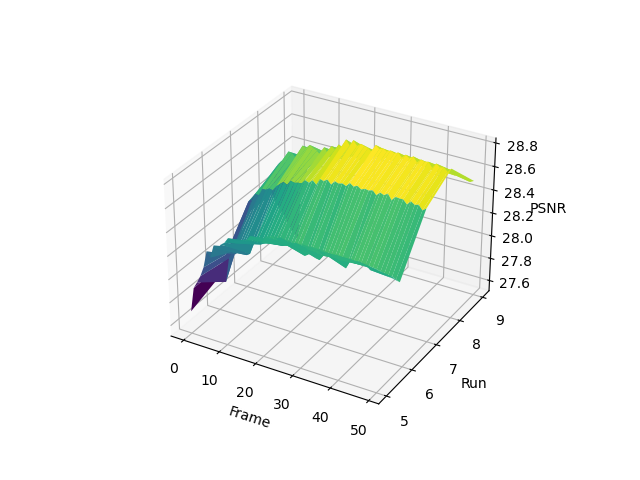

In [5]:
import matplotlib.pyplot as plt
%matplotlib widget


# draw a 3d plot for psnr, x is frame, y is run, z is psnr
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.arange(over_all["per_frame_psnr"].shape[1])
Y = np.arange(over_all["per_frame_psnr"].shape[0])
X, Y = np.meshgrid(X, Y)
Z = over_all["per_frame_psnr"]

# X, Y, Z = X[:5], Y[:5], Z[:5]
X, Y, Z = X[-5:], Y[-5:], Z[-5:]
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Frame')
ax.set_ylabel('Run')
ax.set_zlabel('PSNR')
plt.show()




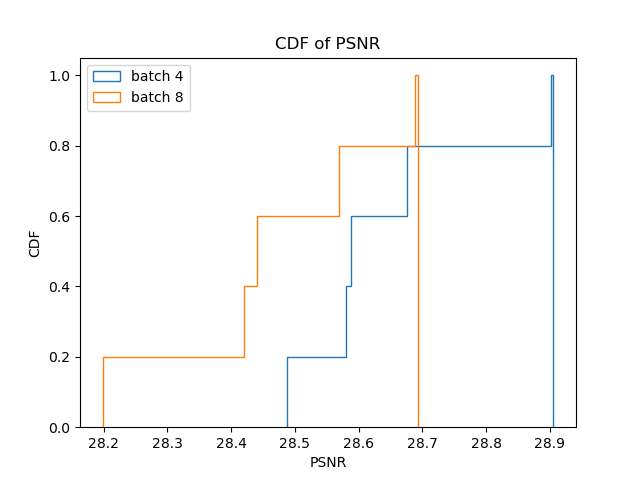

In [6]:
psnrs_4 = np.mean(over_all["per_frame_psnr"][:5], axis=1)
psnrs_8 = np.mean(over_all["per_frame_psnr"][5:], axis=1)
# plot cdf of per run average psnr
plt.figure()
plt.hist(psnrs_4, bins=100, cumulative=True, histtype='step', density=True, label="batch 4")
plt.hist(psnrs_8, bins=100, cumulative=True, histtype='step', density=True, label="batch 8")
plt.xlabel("PSNR")
plt.ylabel("CDF")
plt.title("CDF of PSNR")
plt.legend()
plt.show()